<a href="https://colab.research.google.com/github/vale314/GLAMUR-IA/blob/main/GLAMUR04(SHORT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Realización de un modelo sencillo

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils 
import random

In [2]:
# Import the data from keras.dataset

(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

Cargar el conjunto de datos devuelve cuatro matrices NumPy:

* El `train_images` y `train_labels` arrays con el conjunto de entranamiento que se usaran para realizar el aprendizaje.

* Realiza algo similar para los 2 sets de test `test_images`, y `test_labels` arrays.

Las imágenes son matrices NumPy de 28x28, con valores de píxel que oscilan entre 0 y 255. Las *etiquetas* son una matriz de números enteros, que van del 0 al 9. Estos corresponden a la *clase* de ropa que representa la imagen:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen se asigna a una sola etiqueta. Dado que los * nombres de clase * no se incluyen con el conjunto de datos, guárdelos aquí para usarlos más tarde al trazar las imágenes:

In [3]:
# Son las 10 clases con las que contamos en el modelo
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#Exploramos los datos

In [4]:
#contamos con 6'000 etiqeuetas para entrenamiento
print("etiquetas de entrenamiento: " + str(len(train_labels)))
print("etiquetas de test: " + str(len(test_labels)))
print("Forma de los datos de entrenamiento: " + str(train_images.shape))

etiquetas de entrenamiento: 60000
etiquetas de test: 10000
Forma de los datos de entrenamiento: (60000, 28, 28)


#Preprocesamiento de los datos

Los datos deben preprocesarse antes de entrenar la red. Si inspecciona la primera imagen en el conjunto de entrenamiento, verá que los valores de píxel se encuentran en el rango de 0 a 255:

fatal: destination path 'ssp19ai_utils' already exists and is not an empty directory.
Already up to date.


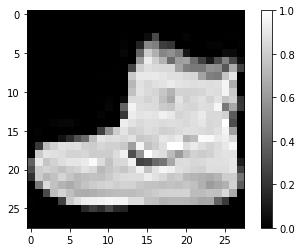

the label is: 9


In [24]:
!git clone https://github.com/liady/ssp19ai_utils.git
!git -C ssp19ai_utils pull
import ssp19ai_utils.utils as utils

utils.plot_image(train_images, train_labels, cmap=plt.cm.gray)

Escalamos estos valores a un rango de 0 a 1 antes de alimentar al modelo de red neuronal. Para esto, dividimos los valores por 255. Es importante que el conjunto de entrenamiento y el conjunto de prueba sean preprocesados ​​de la misma manera:

In [6]:
# Normalizamos las imagenes entre el 0 y el 1.
train_images = train_images / 255.0
test_images = test_images / 255.0

Muestre las primeras 25 imágenes del conjunto de entrenamiento y muestre el nombre de la clase debajo de cada imagen. Verifique que los datos estén en el formato correcto y que estemos listos para construir y entrenar la red.

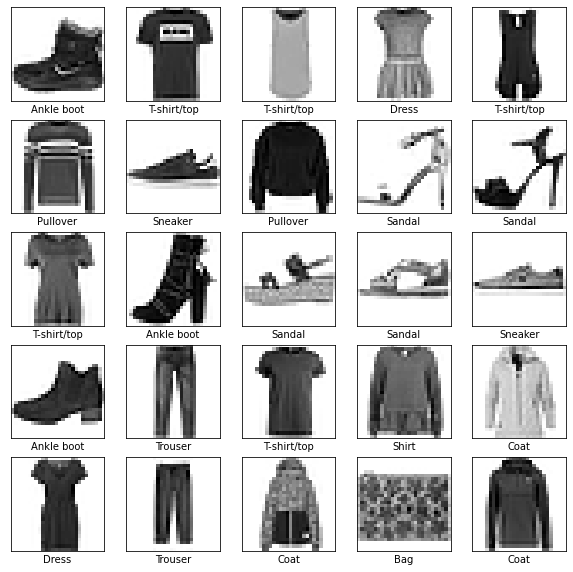

In [7]:
utils.plot_multi_images(train_images, train_labels, class_names)

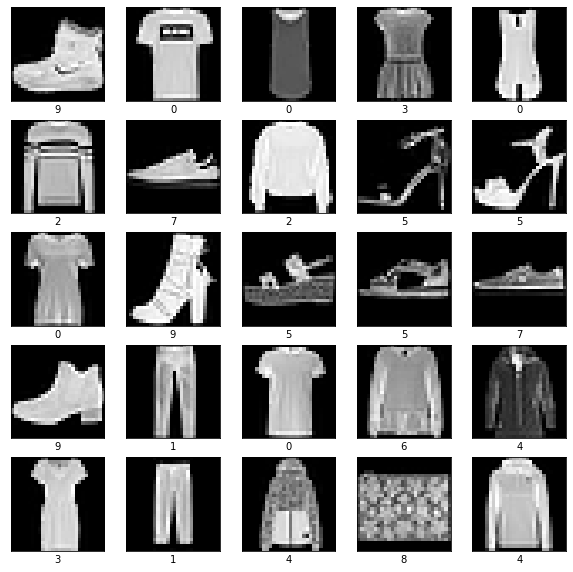

In [8]:
# Mostramos las primeras 25 imagenes del dataset a blanco y negro con la asignacion de numeros y no de clases
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.gray)
  plt.xlabel(train_labels[i])
plt.show()

#Contruyendo el modelo
Construir la red neuronal requiere configurar las capas del modelo y luego compilar el modelo.

Se realiza un modelo donde la capa de entrada es de una matriz de 28 * 28, un reshape para obtener solamente una dimensión, a su vez.

Un Flatten en seguida, (aplanar la matriz a un vetor)

En seguida contamos con una capa de neuronas de 128 de densidad, osea 128 neuronas, con una activacion relu, osea si el valor es menor a 0 es 0, de lo contrario es positivo.


Al final nuestra capa de salida es de 10 nueronas unicamente, por las 10 clases que tenemos dependiendo donde este es lo que se predijo.

La función softmax es utilizada como capa final de los clasificadores basados en redes neuronales.



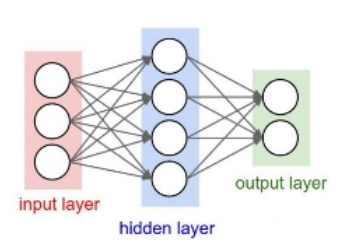

#Creacion

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

#Compilar

Creamos las funciones para el recall, la precision y el f1

In [16]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

Función de pérdida: mide la precisión del modelo durante el entrenamiento. Queremos minimizar esta función para "dirigir" el modelo en la dirección correcta.
     
Optimizer: así es como se actualiza el modelo en función de los datos que ve y su función de pérdida.

Métricas: se utilizan para monitorear los pasos de capacitación y prueba. El siguiente ejemplo utiliza la precisión, la fracción de las imágenes que se clasifican correctamente.

In [17]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', f1_m,precision_m, recall_m])

#Detalles del modelo

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [22]:
import pydot

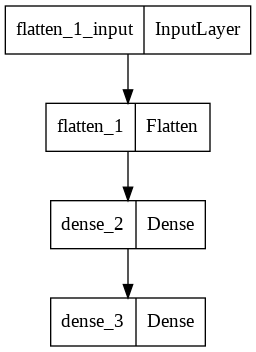

In [23]:
tf.keras.utils.plot_model(model)

#Entrenamiento

In [19]:
history = model.fit(train_images, train_labels, validation_split=0.25, epochs=30)

Epoch 1/30
1407/1407 [==============================] - 7s 5ms/step - loss: 0.5225 - accuracy: 0.8182 - f1_m: 1.5994 - precision_m: 2686567.2500 - recall_m: 1.5492 - val_loss: 0.4317 - val_accuracy: 0.8500 - val_f1_m: 1.3937 - val_precision_m: 1.3807 - val_recall_m: 1.4112
Epoch 2/30
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3909 - accuracy: 0.8595 - f1_m: 1.3549 - precision_m: 1.3343 - recall_m: 1.3802 - val_loss: 0.3768 - val_accuracy: 0.8642 - val_f1_m: 1.3225 - val_precision_m: 1.2985 - val_recall_m: 1.3512
Epoch 3/30
1407/1407 [==============================] - 5s 4ms/step - loss: 0.3523 - accuracy: 0.8725 - f1_m: 1.3086 - precision_m: 1.2826 - recall_m: 1.3394 - val_loss: 0.3720 - val_accuracy: 0.8645 - val_f1_m: 1.2749 - val_precision_m: 1.2442 - val_recall_m: 1.3107
Epoch 4/30
1407/1407 [==============================] - 6s 4ms/step - loss: 0.3243 - accuracy: 0.8802 - f1_m: 1.2804 - precision_m: 1.2510 - recall_m: 1.3148 - val_loss: 0.3522 - val_accurac

In [14]:
#Guardamos el modelo
model.save("modelShort1.h5")

Instalacion de librerias para la muestra de las graficas

In [26]:
!git clone https://github.com/liady/ssp19ai_utils.git
!git -C ssp19ai_utils pull
import ssp19ai_utils.utils as utils

fatal: destination path 'ssp19ai_utils' already exists and is not an empty directory.
Already up to date.


#Evaluacion del modelo

Comparamos el acuraccy con basea las epocas

Como podemos ver a partir de 5 epocas el acuraccy ya es muy poco lo que se adapta o mejora


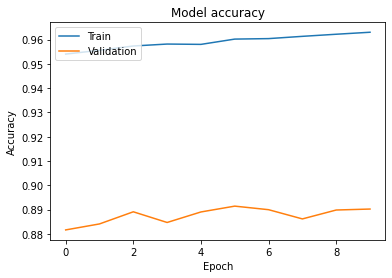

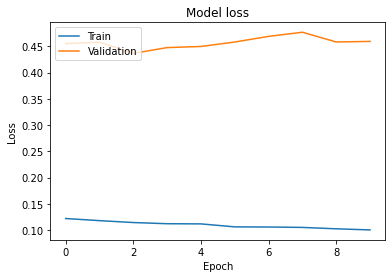

In [36]:
utils.plot_accuracy_and_loss(history)

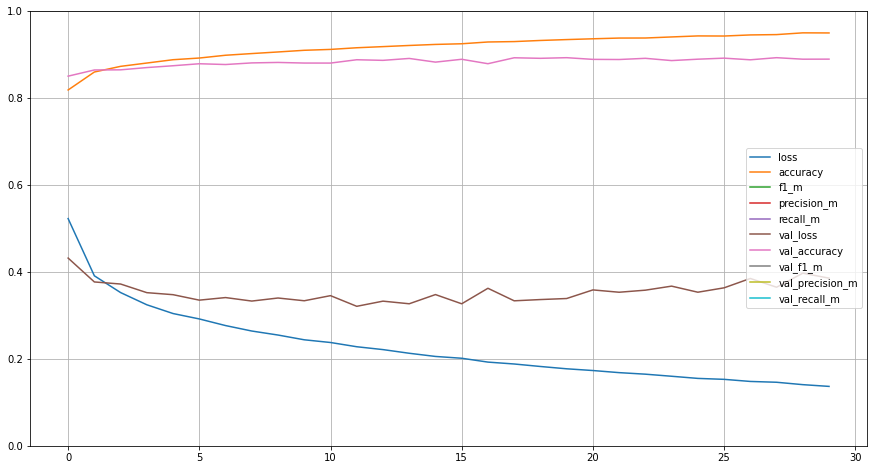

In [21]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(15, 8))
plt.grid(True)
plt.gca().set_ylim(0, 1) # establace el rango en y en [0-1]
plt.show()

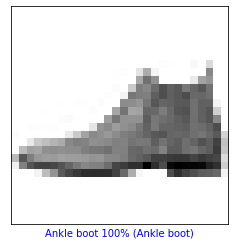

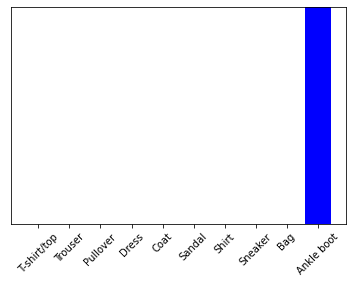

In [39]:
predictions = model.predict(test_images)
index = 0
utils.plot_image_and_prob(predictions, test_labels, test_images, i=index, big=True, class_names=class_names)

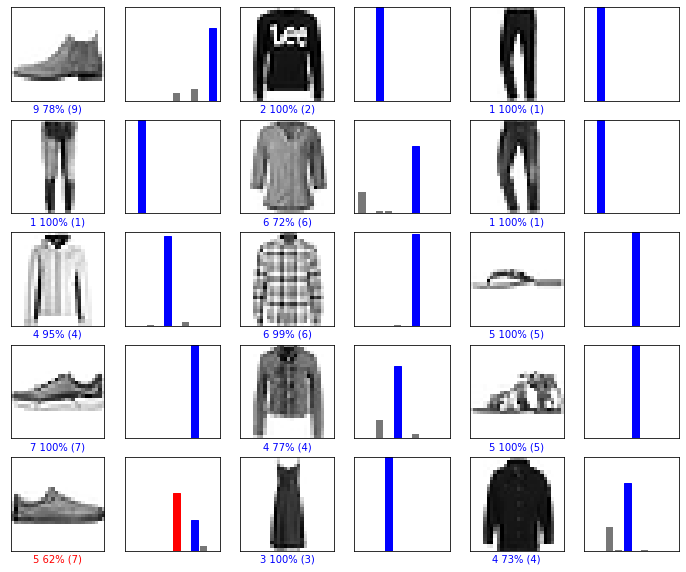

In [ ]:
utils.plot_multi_images_prob(predictions, test_labels, test_images)

#Confusion Matrix

Confusion matrix


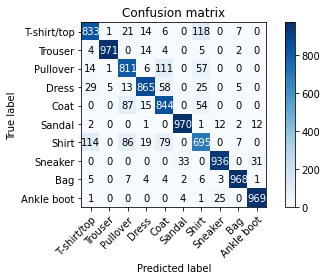

In [40]:
# Como siempre - vamos a convertir la matriz de probabilidades en clases
predicted_classes = utils.label_with_highest_prob(predictions)

# Graficar la matriz
utils.plot_confusion_matrix(y_pred=predicted_classes, y_true=test_labels, classes=np.array(class_names))

TP = True Positive (El que se encuentra en nxn el mas azul), valores postivos predichos como verdaderos

TN = True Negative, valores falsos predichos como falsos

FP = False Positive (Valores falsos que fueron predichos como positivos) Verticalmente

FN = False Negative (Valores negativos que fueron predichos como negativos) Horizontalmente

---------

###Accuracy (Exactitud):

Acuraccy: La proporción del número total de predicciones correctas

Accuracy = (TP + TN) / (TP + TN + FP + FN)


###Loss (Perdida):

Loss: Evalúa la desviación entre las predicciones realizadas por la red neuronal y los valores reales de las observaciones utilizadas durante el aprendizaje. Cuanto menor es el resultado de esta función, más eficiente es la red neuronal

----------

###La precision:

nos marca la calidad del modelo en base a las predicciones.

Precision = TP / (TP+FP)



###Recall (Exhaustividad): 

cantidad que el modelo de machine learning es capaz de identificar

Recall = TP/(TP + FN)

###F1

El valor F1 se utiliza para combinar las medidas de precision y recall en un sólo valor.

El valor F1 asume que nos importa de igual forma la precisión y la exhaustividad.



F1 = 2 * (Precision * Recall) / (Precision + Recall)


In [20]:
loss, accuracy, f1_score, precision, recall = model.evaluate(test_images, test_labels, verbose=0)

print('Test accuracy:', accuracy)
print('Test loss:', loss)
print('Test precision:', precision)
print('Test recall:', recall)
print('Test f1_score:', f1_score)

Test accuracy: 0.8849999904632568
Test loss: 0.4139060974121094
Test precision: 1.0605376958847046
Test recall: 1.1575384140014648
Test f1_score: 1.1058753728866577


#Evaluamos dentro de un rango si evalua correctamente

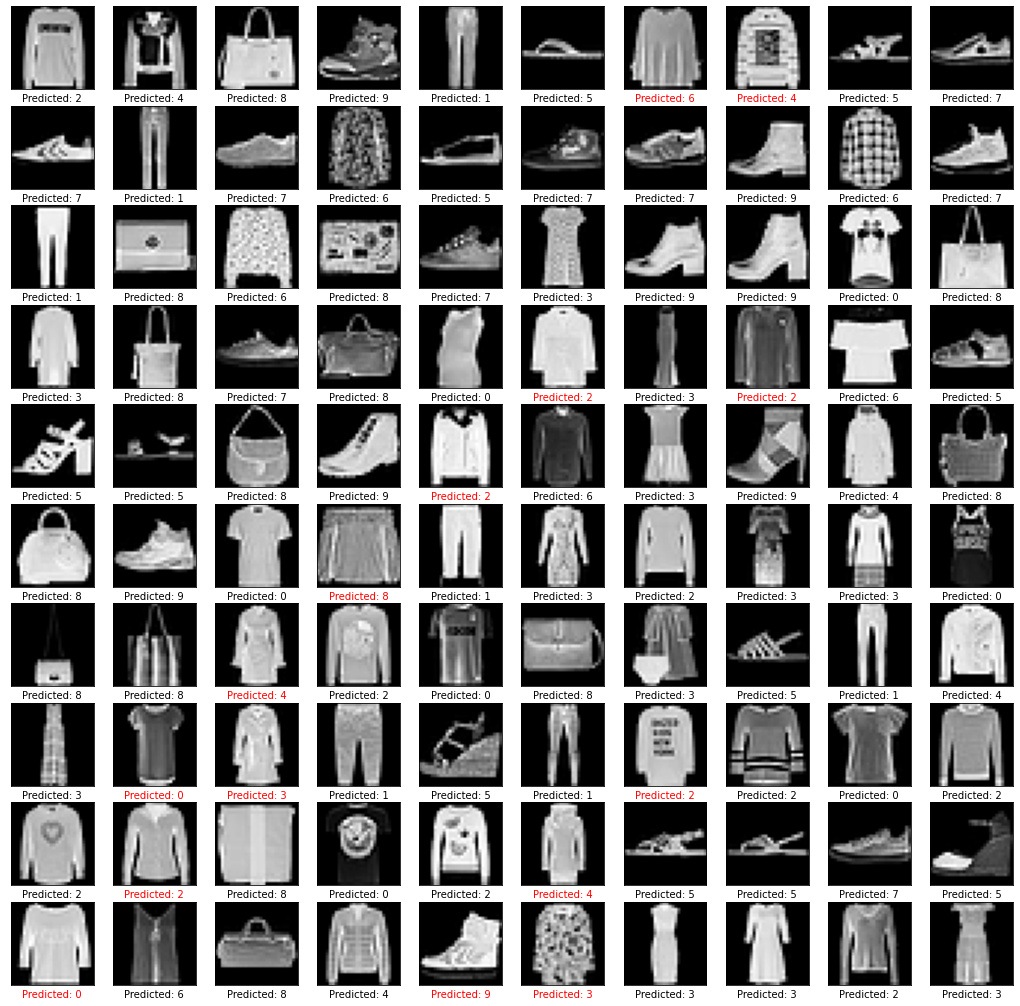

In [ ]:
# Una función auxiliar que devuelve 'rojo'/'negro' dependiendo de si son dos entradas
# parámetro coincide o no.

def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Prediga las etiquetas de las imágenes de dígitos en nuestro conjunto de datos de prueba.

predictions = model.predict(test_images)

# Como la salida del modelo, 10 flotantes que representan la probabilidad de la imagen de entrada
# siendo un dígito del 0 al 9, necesitamos encontrar el mayor valor de probabilidad
# para averiguar qué dígito predice el modelo como más probable en la imagen.

prediction_digits = np.argmax(predictions, axis=1)

# Luego trace 100 imágenes de prueba aleatorias y sus etiquetas predichas.
# Si el resultado de una predicción es diferente de la etiqueta proporcionada en "prueba"
# conjunto de datos, lo resaltaremos en color rojo.

plt.figure(figsize=(18, 18))
for i in range(100):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  image_index = random.randint(0, len(prediction_digits))
  plt.imshow(test_images[image_index], cmap=plt.cm.gray)
  ax.xaxis.label.set_color(get_label_color(prediction_digits[image_index],\
                                           test_labels[image_index]))
  plt.xlabel('Predicted: %d' % prediction_digits[image_index])
plt.show()


#Utilizando el modelo con nuestros datos

In [ ]:
from google.colab import files
uploaded = files.upload()

image_name = ""

for key in uploaded.keys():
  image_name = key;

# painting=plt.imread(image_name)
# print(painting.shape)

Saving 1.jpg to 1.jpg


1.jpg

In [ ]:
from PIL import Image 
import PIL.ImageOps 
### Cambiamos a blanco y negro la imagen 1 capa
image_file = Image.open(image_name) 
image_file = image_file.convert('1')
image_file.save('result.jpg')

### Se invierten los colores
image = Image.open('result.jpg')
image_file = PIL.ImageOps.invert(image)
image_file.save('result.jpg')

### Se normaliza la imagen
painting=plt.imread("result.jpg")
datas = painting / 255.0

In [ ]:
arr = np.array([datas, datas])

pre = model.predict(arr)

prediction_digits = np.argmax(pre, axis=1)

# print (prediction_digits[0])

print("Numero en clase: " + str(prediction_digits[0]) + "    Nombre de clase: " + str(class_names[prediction_digits[0]]))

Numero en clase: 8    Nombre de clase: Bag
